In [1]:
import cv2
import sys
import numpy as np
from os.path import join
import matplotlib.pyplot as plt
from projeto_helper import BeerClassification

PATH = 'C:\\Users\\marco\\Google Drive\\ComputerScience\\Visão Computacional\\images\\Skol'

In [2]:
bc = BeerClassification(PATH, ['0', '1', '2'])
query_img = plt.imread(bc.imgs[0])
train_img = plt.imread(bc.imgs[105]) # 105
for i, label in enumerate(bc.labels):
    print(i, label)

0 0_v000_0.jpg
1 0_v000_45L.jpg
2 0_v000_45R.jpg
3 0_v001_0.jpg
4 0_v001_45L.jpg
5 0_v001_45R.jpg
6 0_v002_0.jpg
7 0_v002_45L.jpg
8 0_v002_45R.jpg
9 0_v003_0.jpg
10 0_v003_45L.jpg
11 0_v003_45R.jpg
12 0_v004_0.jpg
13 0_v004_45L.jpg
14 0_v004_45R.jpg
15 0_v005_0.jpg
16 0_v005_45L.jpg
17 0_v005_45R.jpg
18 0_v006_0.jpg
19 0_v006_45L.jpg
20 0_v006_45R.jpg
21 0_v007_0.jpg
22 0_v007_45L.jpg
23 0_v007_45R.jpg
24 0_v008_0.jpg
25 0_v008_45L.jpg
26 0_v008_45R.jpg
27 0_v009_0.jpg
28 0_v009_45L.jpg
29 0_v009_45R.jpg
30 0_v010_0.jpg
31 0_v010_45L.jpg
32 0_v010_45R.jpg
33 0_v011_0.jpg
34 0_v011_45L.jpg
35 0_v011_45R.jpg
36 0_v012_0.jpg
37 0_v012_45L.jpg
38 0_v012_45R.jpg
39 0_v013_0.jpg
40 0_v013_45L.jpg
41 0_v013_45R.jpg
42 0_v014_0.jpg
43 0_v014_45L.jpg
44 0_v014_45R.jpg
45 0_v015_0.jpg
46 0_v015_45L.jpg
47 0_v015_45R.jpg
48 0_v016_0.jpg
49 0_v016_45L.jpg
50 0_v016_45R.jpg
51 0_v017_0.jpg
52 0_v017_45L.jpg
53 0_v017_45R.jpg
54 0_v018_0.jpg
55 0_v018_45L.jpg
56 0_v018_45R.jpg
57 0_v019_0.jpg
58 0_v

In [3]:
mask = plt.imread(join(PATH, 'mask0.jpg'))
query_img_m = cv2.bitwise_and(query_img, mask)

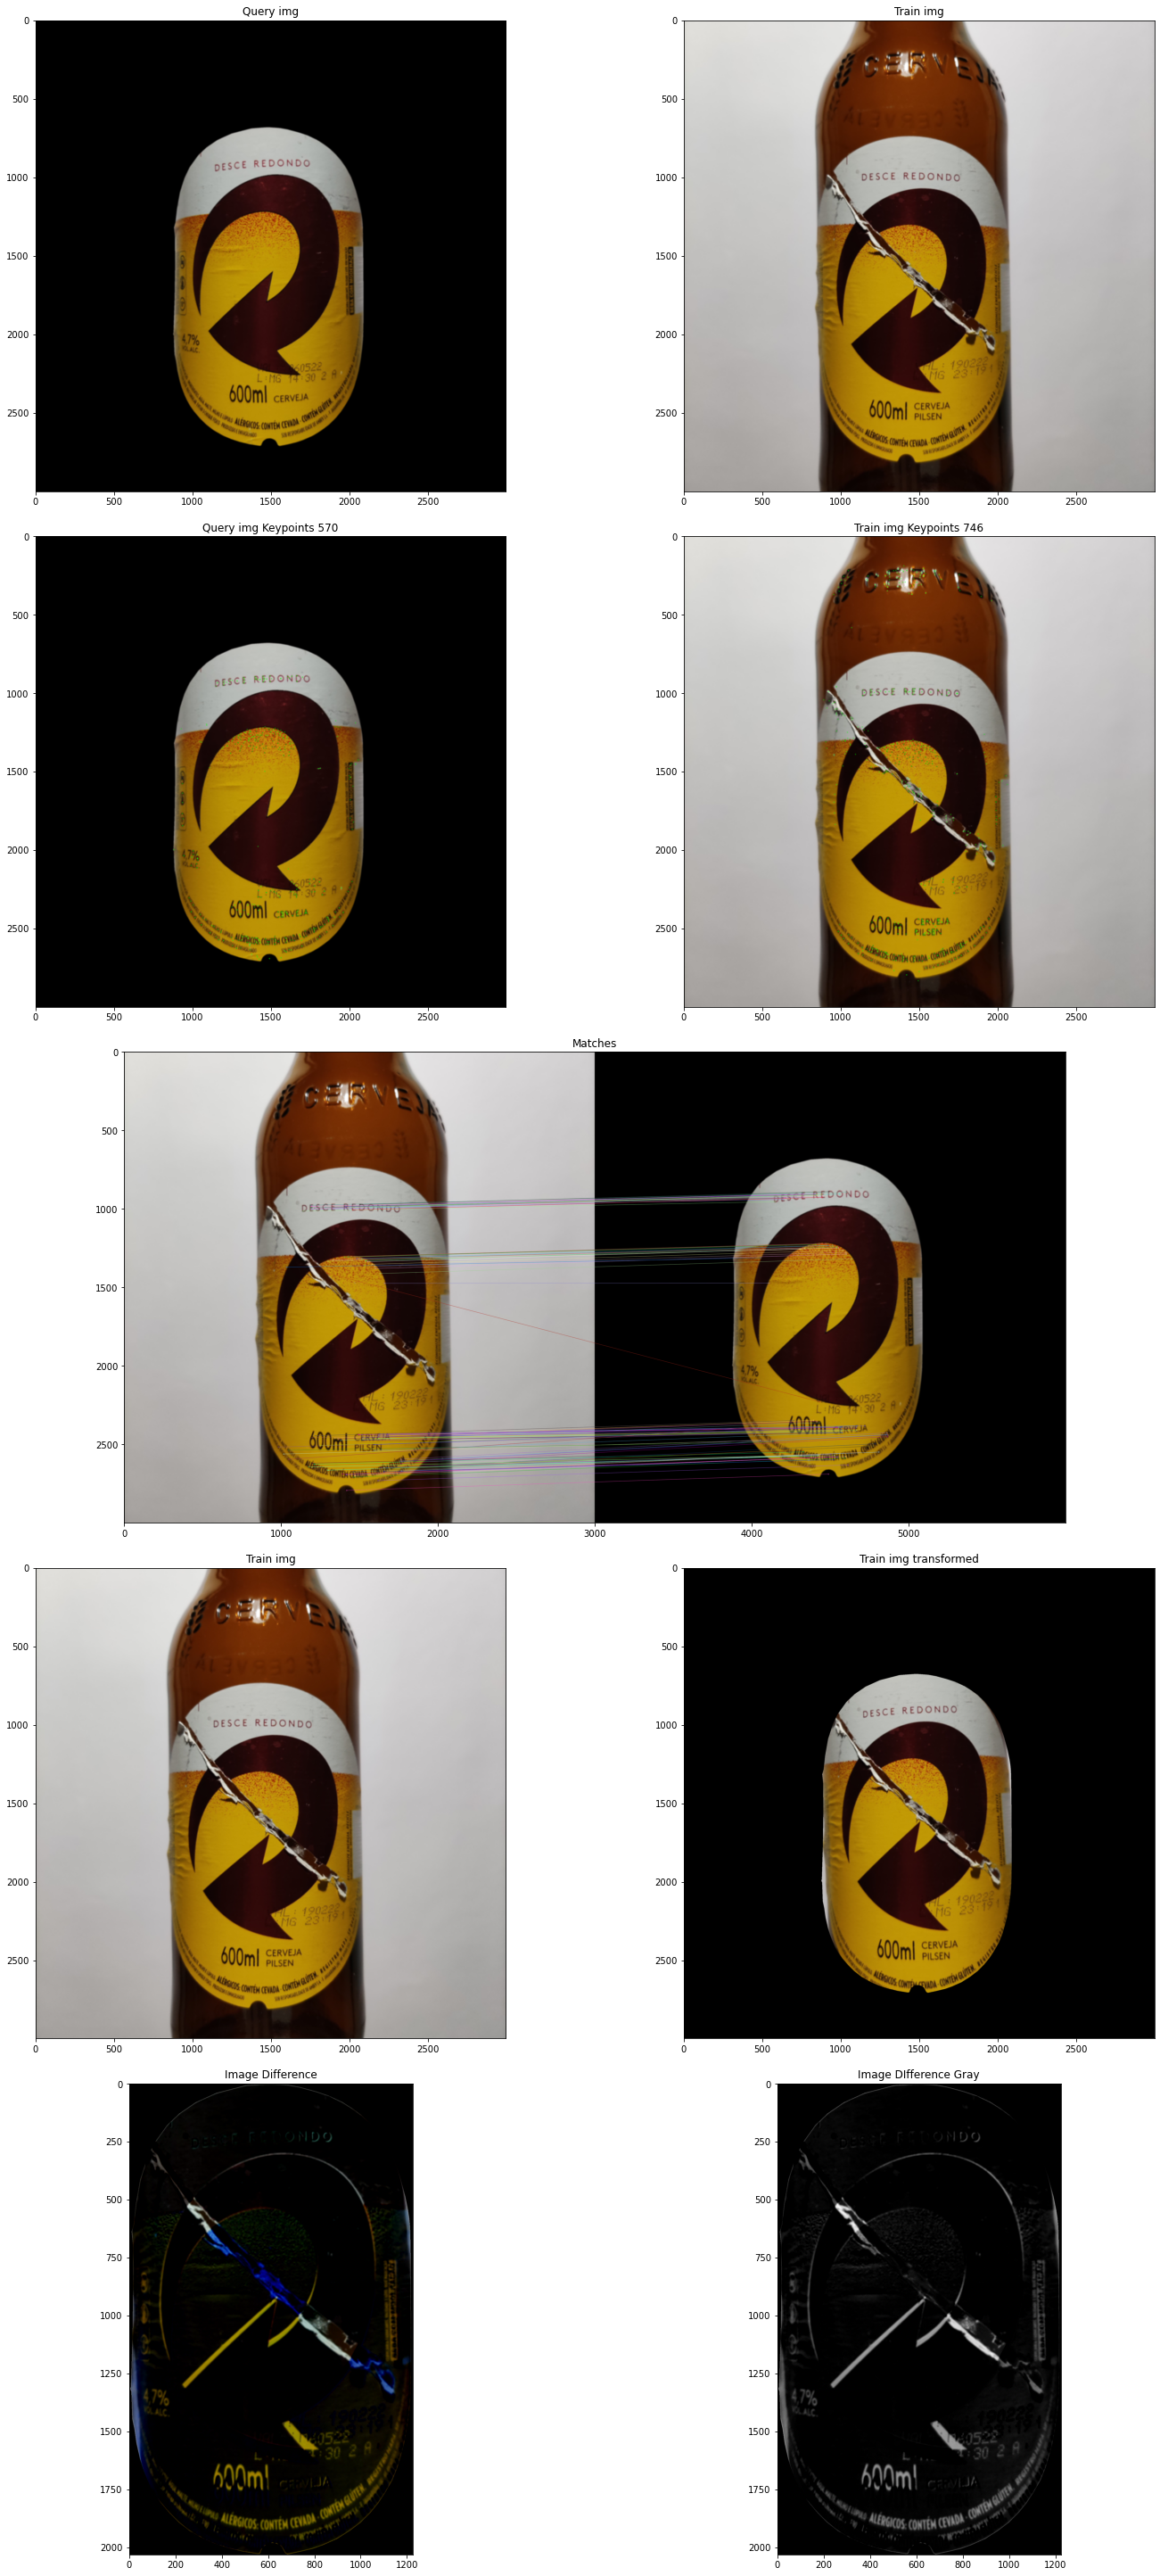

In [4]:
img_diff = bc.processGetDiff(query_img_m, mask, train_img, plot=True, nfeatures=4000, nOctaveLayers=6, edgeThreshold=4, sigma=2.5)